## Customer Churn | EDA and Modeling

### Problem Definition & Business Goal
Customer churn is the percentage of customers who stop doing business with a company within a specific period (in this dataset, it is measured monthly). Customer churn is a critical issue for businesses, as it directly impacts revenue and growth. The challenge is identifying which customers are at risk of leaving, allowing for timely intervention.

The business goal of this project is to build a predictive model that identifies high-risk customers, allowing the company to implement targeted retention strategies. By predicting churn in advance, the company can improve customer retention, reduce churn rates, and increase customer lifetime value, ultimately driving profit/revenue growth.

### Dataset Overview
#### Features
- CustomerID: A unique ID that identifies each customer.
- Gender: The customer’s gender: **Male, Female**
- Senior Citizen: Indicates if the customer is 65 or older: **1, 0**
- Partner: Indicates if the customer is married: **Yes, No**
- Dependents: Indicates if the customer lives with any dependents: **Yes, No. Dependents could be children, parents, grandparents, etc.**
- Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- Phone Service: Indicates if the customer subscribes to home phone service with the company: **Yes, No**
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: **Yes, No, No phone service**
- Internet Service: Indicates if the customer subscribes to Internet service with the company: **No, DSL, Fiber Optic, Cable.**
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: **Yes, No, No internet service**
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: **Yes, No, No internet service**
- Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: **Yes, No, No internet service**
- Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: **Yes, No, No internet service**
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: **Yes, No, No internet service** (The company does not charge an additional fee for this service.)
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: **Yes, No, No internet service** (The company does not charge an additional fee for this service.)
- Contract: Indicates the customer’s current contract type: **Month-to-Month, One Year, Two Year.**
- Paperless Billing: Indicates if the customer has chosen paperless billing: **Yes, No**
- Payment Method: Indicates how the customer pays their bill: **Bank Withdrawal, Credit Card, Mailed Check, Electronic Check**
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges.
#### Target
- **Churn: Yes = the customer left the company this quarter. No = the customer remained with the company.**

[Source](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113) for dataset descriptions

### Goal
The goal of this project is to develop a machine learning model that accurately predicts customer churn based on available customer data, enabling businesses to proactively address churn before it happens. The prime metric for measuring the statistical power of each model will be the Area Under the Receiver Operator Characteristic Curve (AUC-ROC). Accuracy, recall, F1-score, and a confusion matrix of the predictions will also be produced.

## Import Libraries & Data

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sci-Kit Learn
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models to test
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(data.head(), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


None

## Pre-Processing
### Cleaning

In [3]:
print('There are no missing values')
print(data.isnull().sum())

print('\nThere is no duplicate data')
print(data[data.duplicated()])

print('\nThere is a class imbalance (5174 unchurned, 1869 churned)')
print(data['Churn'].value_counts())

There are no missing values
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no duplicate data
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

There is a class imbalance (5174 unchurned, 1869 churned)
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [4]:
# Map Senior Citizen 1 and 0 to Yes and No
data['SeniorCitizen'] = data['SeniorCitizen'].map({1: "Yes", 0:"No"})

In [5]:
# Change TotalCharges from object type to float64 type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# 11 Null Values created, therefore we impute the median charges
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [6]:
print("Unique values in each feature (Each feature has expected number of values)")
for cname in data.columns:
    if data[cname].dtype == 'object':
        print(f"{cname}: {data[cname].nunique()}")

Unique values in each feature (Each feature has expected number of values)
customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Churn: 2


## Exploratory Data Analysis (EDA)

*(Below plots highlight trends in customer churn. Notable findings will be summarized after each visualization.)*

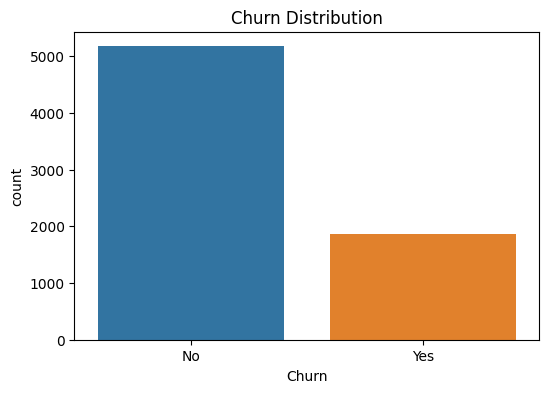

In [7]:
# Visual illustrating churn class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Churn'], hue=data['Churn'])
plt.title("Churn Distribution")
plt.show()

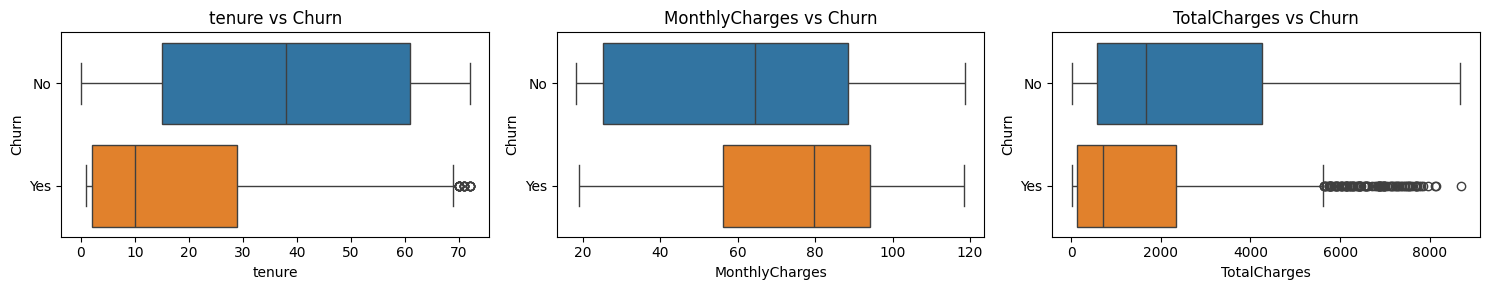

In [8]:
# Numeric feature distribution between churned and non-churned customers
# 3 Numeric Columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(len(numerical_cols)*5, len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data, x=col, y="Churn", hue="Churn")
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()

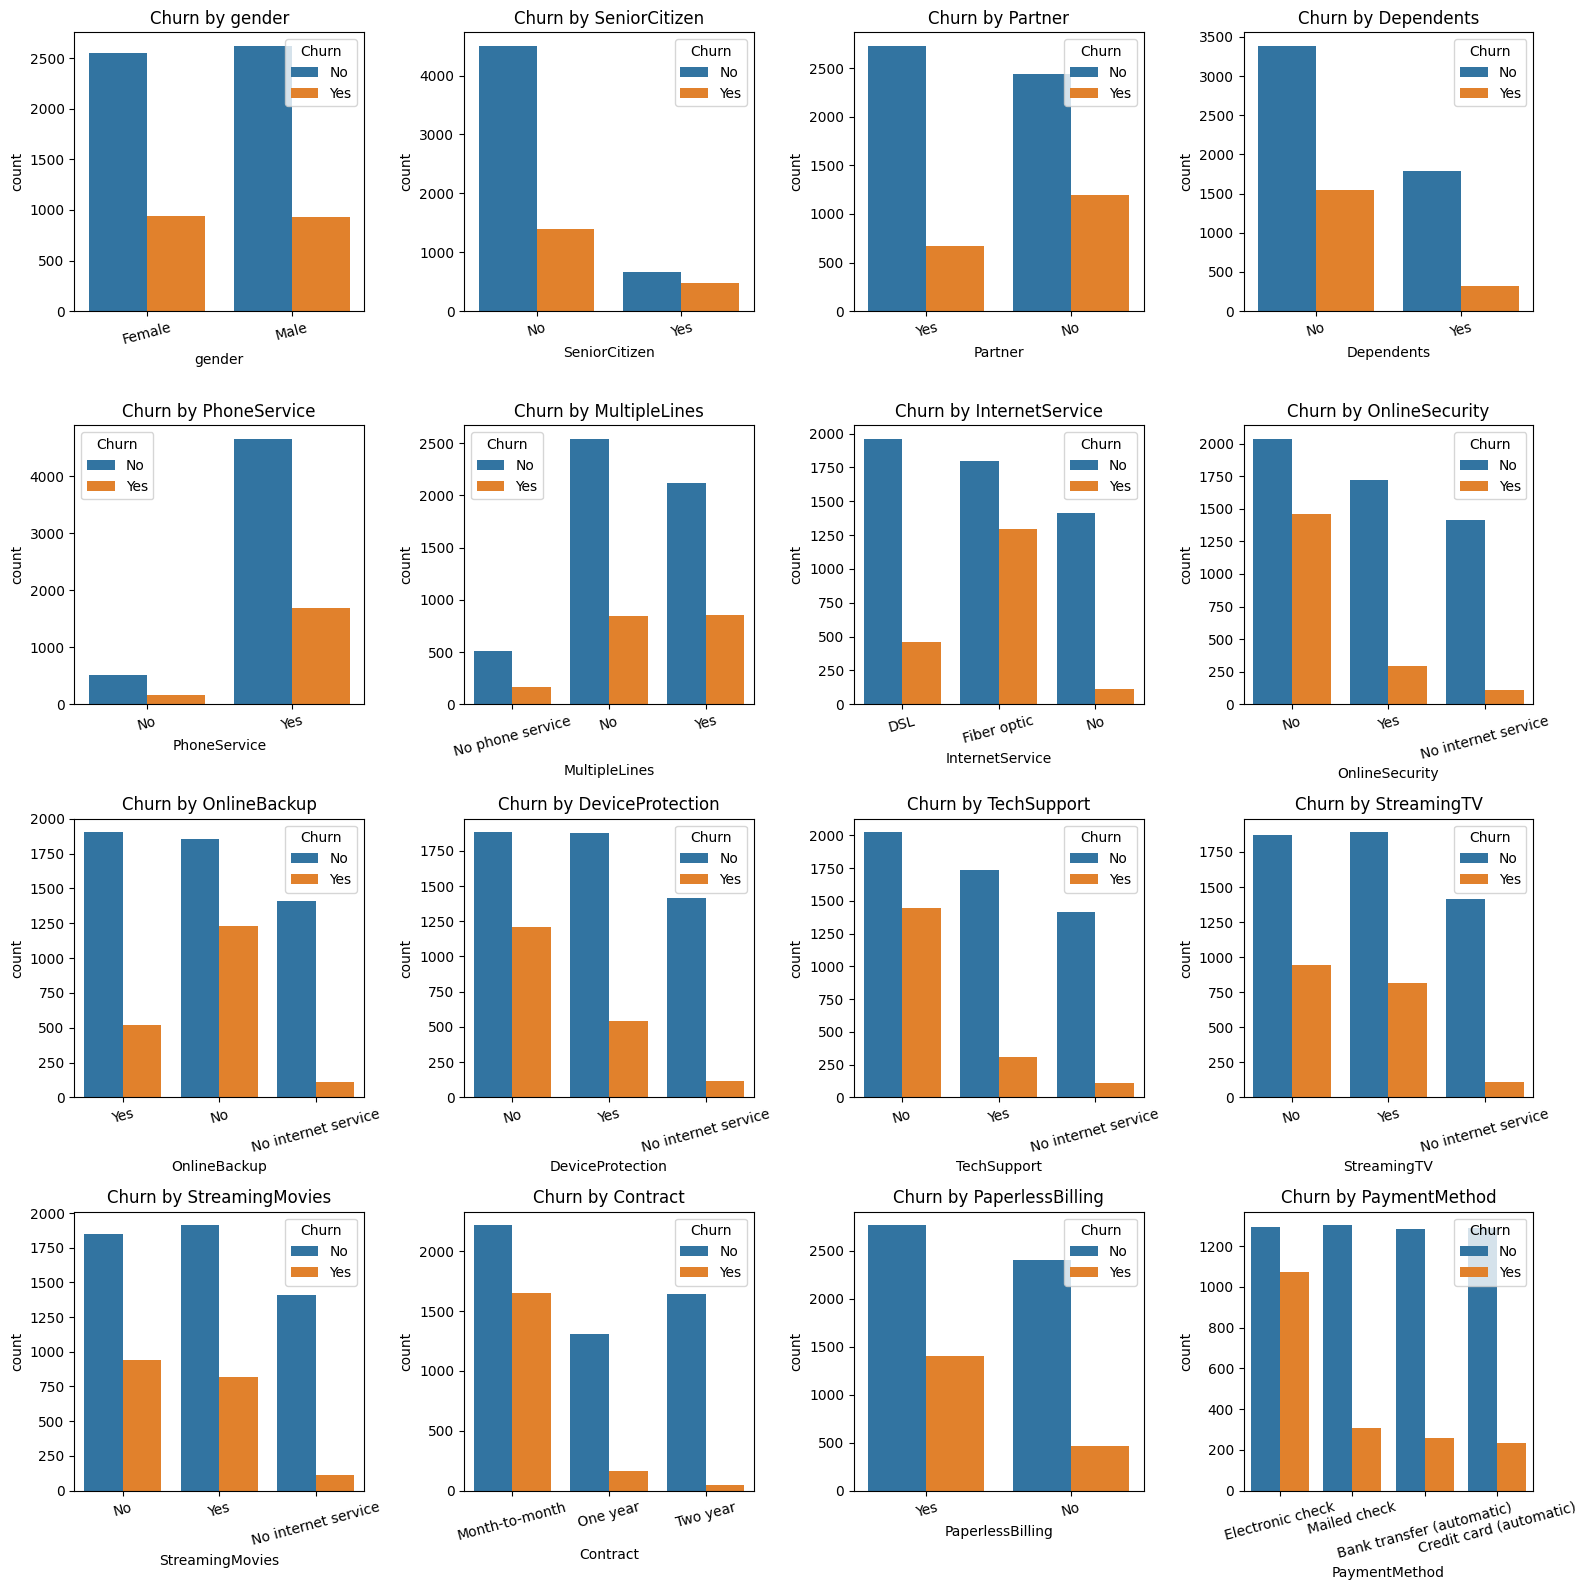

In [9]:
# Categorical feature distribution between churned and non-churned customers
# 16 Categorical Columns
categorical_cols = data.drop(['customerID', 'Churn'], axis=1).select_dtypes(include=['object']).columns

plt.figure(figsize=(16, len(categorical_cols)))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data, x=col, hue="Churn")
    plt.xticks(rotation=15)
    plt.title(f"Churn by {col}")

plt.tight_layout()
plt.show()

Gender has no correlation to churn
PhoneService accounts for No phone Service in MultipleLines
InternetService accounts for No internet service in OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies

In [10]:
# No Phone Service and No Internet Service guarentees a "No" for downstream features. Converting values to create binary features for correlation and improved model performance.
# Convert PhoneService dependency in MultipleLines to "No"
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})

# List of features dependent on InternetService
internet_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert InternetService dependencies to "No"
for col in internet_features:
    data[col] =  data[col].replace({'No internet service': 'No'})  # Convert 'No internet service' to 'No'

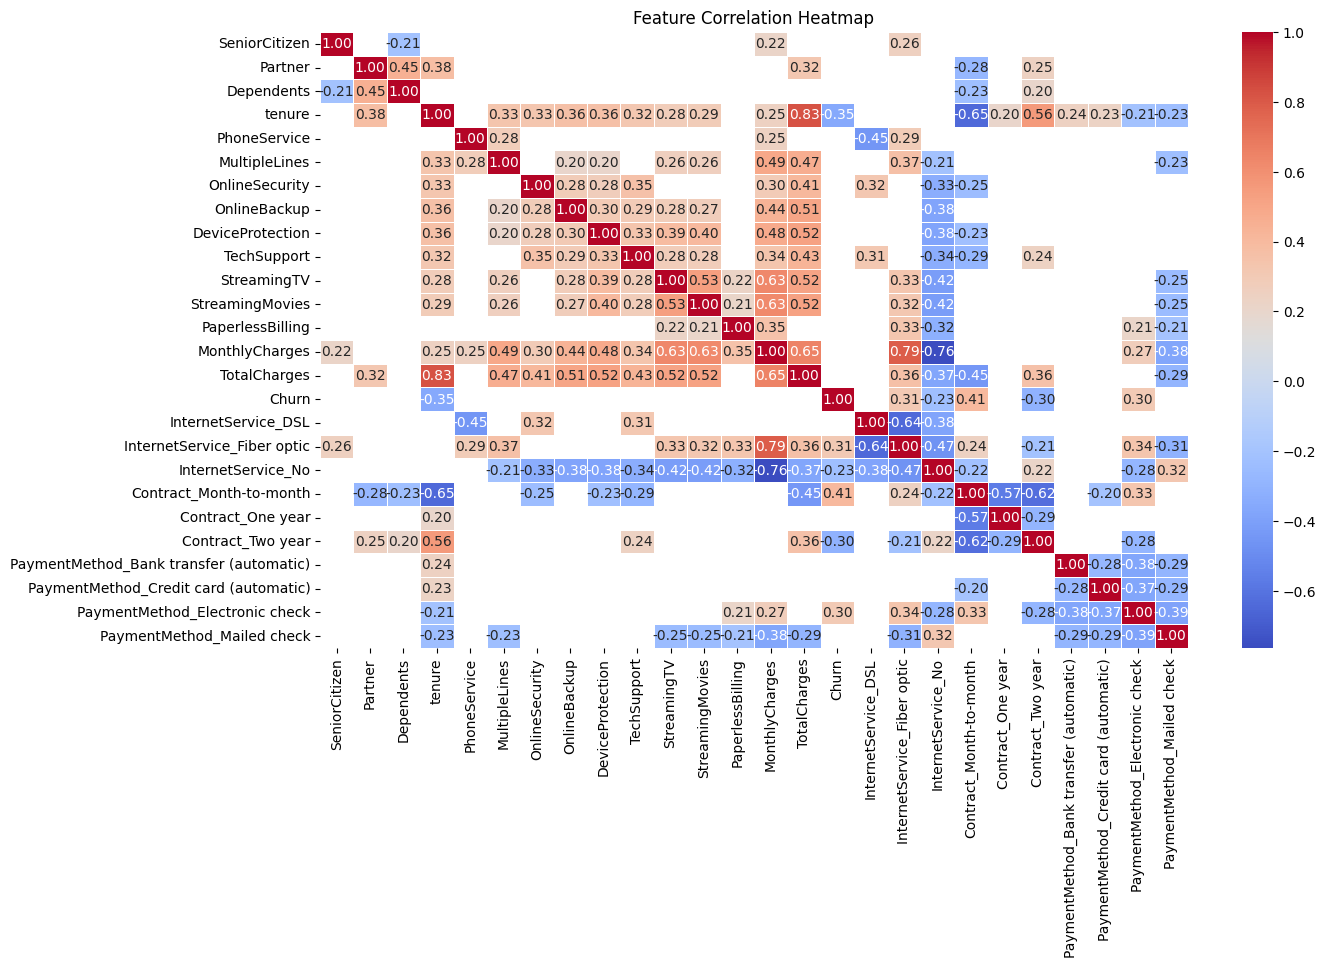

In [11]:
# Correlation Heatmap. Dropping customerID and gender as they have zero correlation to churn
data = data.drop(['customerID', 'gender'], axis=1)

# Extract binary (Yes, No) columns from data
binary_cols = [col for col in data.columns if data[col].nunique() == 2]

# Encode binary columns (1, 0)
le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

# Create Correlation Matrix
data_corr = pd.get_dummies(data).corr()

# Filter out weak correlations (e.g., |r| <= .2)
filtered_corr = data_corr[abs(data_corr) > .2]

# Heatmap of correlations
plt.figure(figsize=(14,8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# Get correlations with Churn (absolute values sorted in descending order, stored with their original sign)
churn_corr = data_corr['Churn'][data_corr['Churn'].abs().sort_values(ascending=False).index]

print("Correlations for Churn (Sorted by absolute value with original sign)")
print(churn_corr)

Correlations for Churn (Sorted by absolute value with original sign)
Churn                                      1.000000
Contract_Month-to-month                    0.405103
tenure                                    -0.352229
InternetService_Fiber optic                0.308020
Contract_Two year                         -0.302253
PaymentMethod_Electronic check             0.301919
InternetService_No                        -0.227890
TotalCharges                              -0.199037
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
Contract_One year                         -0.177820
OnlineSecurity                            -0.171226
TechSupport                               -0.164674
Dependents                                -0.164221
SeniorCitizen                              0.150889
Partner                                   -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.12

## Feature Engineering

### First round of FE
Tenure is negatively correlated with churn
- Group tenure into categories (New, Mid, Long-term customers).

MonthlyCharges is positively correlated with churn
- Create a "high spenders" category to see if expensive plans impact churn.

TechSupport, OnlineSecurity, OnlineBackup, and DeviceProtection show negative correlations with churn
- Create a new "HasSupportServices" feature combining these four into one. True if customer has 2 or more

Contract (Month-To-Month) positively correlated with churn. Contract (Two-Year) and Contract (One-Year) negatively correlated with churn
- Group contract types into Binary "Long-Term vs. Month-to-Month"

### Second round of FE

MonthlyCharges and Tenure may interact
- Those who spends a lot but have a low tenure may be more likely to leave than those who spend little and have a high tenure
- Multiply MonthlyCharges by Tenure

**Explanation:** Feature transformations were chosen based on their correlation with churn. Higher correlation values suggest a stronger relationship with customer retention.

In [13]:
# Group tenure by term
data['tenureTerm'] = pd.cut(data['tenure'], bins=[0, 12, 36, 72], labels=['New', 'Mid', 'Long'], include_lowest=True)

# Create binary HighSpender feature, 1 and 0
data['HighSpender'] = (data['MonthlyCharges'] > data['MonthlyCharges'].median()).astype(int)

# Create binary HasSupportServices, 1 and 0
data['HasSupportServices'] = (data[['TechSupport', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection']].sum(axis=1) > 1).astype(int)

# Create binary LongTermContract, 1 and 0
data['LongTermContract'] = data['Contract'].apply(lambda x: 1 if x in ['One year', 'Two years'] else 0)

# Second round of Feature Engineering
# Create feature to represent interaction between MonthlyCharges and tenure
data['MCbyTenure'] = data['MonthlyCharges'] * data['tenure']

In [14]:
# Check if new features improve correlation
new_data_corr = pd.get_dummies(data).corr()
new_churn_corr = new_data_corr['Churn'][new_data_corr['Churn'].abs().sort_values(ascending=False).index]

print('Correlation of new features to churn')
print(new_churn_corr.drop(churn_corr.index))

Correlation of new features to churn
tenureTerm_New        0.317580
tenureTerm_Long      -0.285072
MCbyTenure           -0.198514
HighSpender           0.195663
HasSupportServices   -0.177945
LongTermContract     -0.177820
tenureTerm_Mid       -0.013523
Name: Churn, dtype: float64


## Model Selection & Training

In [58]:
# Split into features and target
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Split columns into numeric and categorical
numerical_col = X.select_dtypes(include=['int64', 'float64']).columns
categorical_col = X.select_dtypes(include=['object']).columns

In [68]:
# No values to impute; included regardless
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# No values to impute; included regardless
categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder())
])

# Preprocessing Pipeline step
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numerical_col),
        ('cat', categoric_transformer, categorical_col)
    ]
)

# Create Pipeline,
# Apply SMOTE for handling class imbalance
# SMOTE: Synthetic Minority Over-sampling Technique
my_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    #('smote', SMOTE(random_state=0)),
    ('classifier', LogisticRegression(random_state=0))
])

## Model Evaluation
### Logistic Regression

In [69]:
def display_evaluation(preds, name, model):
    print(f" Performance:")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))

    conf_matrix = confusion_matrix(y_test, preds)
    print(f"Confusion Matrix: \n{conf_matrix}")

    if hasattr(model, "predict_proba"):  # Not all models have predict_proba
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"AUC-ROC: {roc_auc:.4f}")

# Test out first pipeline/model
my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_test)
display_evaluation(preds, 'Logistic Regression', my_pipeline)

 Performance:
Accuracy: 0.7977
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix: 
[[932 109]
 [176 192]]
AUC-ROC: 0.8275


### LinearSVC, Random Forest, and XGBClassifer

In [70]:
# Let's test out a few models before stopping on Logistic Regression
models = {
    "LinearSVC": LinearSVC(max_iter=5000, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=0),
    "XGBClassifer": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, eval_metric='logloss', random_state=0),
}

# Loop through the models
for name, model in models.items():
    print(f"\nTraining model: {name}\n" + "-"*30)

    # Define pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        #('smote', SMOTE(random_state=0)),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    display_evaluation(preds, name, pipeline)



Training model: LinearSVC
------------------------------
 Performance:
Accuracy: 0.7970
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix: 
[[935 106]
 [180 188]]

Training model: Random Forest
------------------------------
 Performance:
Accuracy: 0.7743
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.58      0.47      0.52       368

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409

Confusion Matrix: 
[[917 124]
 [194 174]]
AUC-ROC: 0.8121

Training model: XGBClassifer
------------------------------
 Pe

### Final Model
Even with tuning, these three models underperformed Logistic Regression by the **Area Under Curve the Receiver Operating Characteristic Curve (AUC-ROC)**. Therefore, due to its explainability and ability to predict churned customers, **Logistic Regression will be the final model.**

## Interpretation & Insights
### Influential Features on Churn

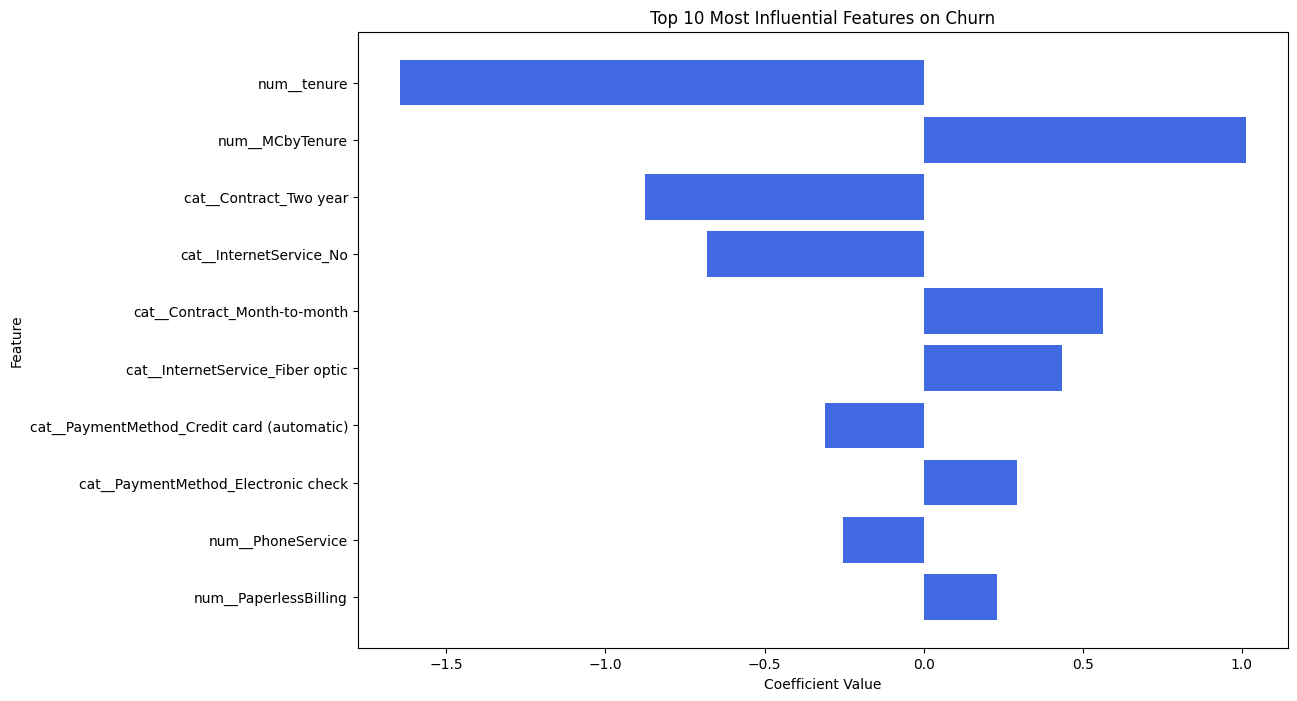

In [65]:
# Extract feature names from preprocessing
feature_names = my_pipeline.named_steps['preprocessor'].get_feature_names_out()
# Extract coefficients from classifier
coefficients = my_pipeline.named_steps['classifier'].coef_[0]

# Sort features by absolute value
# Return indices that would sort the array, then reverses list
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = feature_names[sorted_indices]
sorted_coeffs = coefficients[sorted_indices]

# Plot
plt.figure(figsize=(12, 8))
plt.barh(sorted_features[:10], sorted_coeffs[:10], color='royalblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 10 Most Influential Features on Churn")
plt.gca().invert_yaxis()
plt.show()

#### Top Three Risk Factors:
- High Monthly Cost and Tenure
- A Month-to-Month Contract
- Fiber Optic Internet

#### Top Three Loyalty Factors:
- High Tenure
- A Two-Year Contract
- No Internet

### Highest Risk Customers

In [67]:
X_test['Predicted_Churn_Probability'] = my_pipeline.predict_proba(X_test)[:, 1]
high_risk_customers = X_test.sort_values(by="Predicted_Churn_Probability", ascending=False).head(10)
high_risk_customers

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenureTerm,HighSpender,HasSupportServices,LongTermContract,MCbyTenure,Predicted_Churn_Probability
3380,1,1,0,1,1,1,Fiber optic,0,0,0,...,1,Electronic check,95.10,95.10,New,1,0,0,95.10,0.950479
2631,1,1,0,7,1,1,Fiber optic,0,0,1,...,1,Electronic check,99.25,665.45,New,1,0,0,694.75,0.939628
6866,0,0,0,1,1,1,Fiber optic,0,0,0,...,1,Electronic check,95.45,95.45,New,1,0,0,95.45,0.934089
6482,0,0,0,1,1,1,Fiber optic,0,0,1,...,1,Electronic check,101.45,101.45,New,1,0,0,101.45,0.932304
1564,1,0,0,10,1,1,Fiber optic,0,0,0,...,1,Electronic check,95.35,898.35,New,1,0,0,953.50,0.929725
4585,1,0,0,1,1,1,Fiber optic,0,0,0,...,1,Electronic check,85.05,85.05,New,1,0,0,85.05,0.929518
6626,1,1,0,6,1,0,Fiber optic,0,0,1,...,1,Electronic check,95.75,573.75,New,1,0,0,574.50,0.923529
371,0,0,0,2,1,1,Fiber optic,0,0,0,...,1,Electronic check,85.65,181.50,New,1,0,0,171.30,0.921236
2955,0,0,0,7,1,1,Fiber optic,0,0,0,...,1,Electronic check,93.85,635.60,New,1,0,0,656.95,0.921212
5937,1,1,0,8,1,1,Fiber optic,0,0,0,...,1,Electronic check,84.00,613.40,New,1,0,0,672.00,0.920137


#### Insights About Highest-Risk Customers
All the highest-risk customers:
- Have a 'New' Tenure term
- Have a Phone Service
- Use Fiber Optic Internet
- Pay with Electronic Check
- Have High Monthly Charges
- Are Classified as High Spenders
- Lack Support Services
- Have a Short Term Contract

#### Actions to take to Lower Risk of Churn
- Provide discount to Monthly Charges
- Offer better access to Support Services
- Provide better One-Year and Two-Year contracts
- Provide Six-Month contract to better capture customer preferences

## Model Performance Summary
##### **Performance Metrics (Final Model - Logistic Regression)**

| Metric    | Score  |
| --------- | ------ |
| Accuracy  | 79.77% |
| ROC AUC   | 82.75% |
| Precision | 79.00% |
| Recall    | 80.00% |

##### **Key Observations:**
**Why did Logistic Regression perform best?**
- Logistic Regression had the greatest AUC-ROC of all other models tested. While this metric was the most important, Logistic Regression also has the advantage of being easily explained, unlike black box models such as XGBClassifier. This explainability is important for the stakeholders to get a clear view of what features have the greatest impact on churn.

**Did class imbalance impact performance?**
- Synthetic Minority Oversampling Technique (SMOTE) was attempted to reduce the effect of class imbalance. After experimentation, however, it was found that SMOTE actually lowered the metrics of the models. This was likely because class imbalance wasn't extreme (73.46% Not Churned, 26.54% Churned), so applying SMOTE would only introduce noise and distort feature distributions. In the future, more research will be done into better techniques for ameliorating class imbalance.

**What trade-offs exist?**
- First, some metric definitions:
    - Accuracy measures overall correctness (True Pos + True Neg)/(Total Preds)
    - Precision measures the accuracy of positive predictions True Pos/(True Pos + False Pos)
    - Recall measures the accuracy of all actual positive instances True Pos/(True Pos + False Neg).
- Increasing True Positives would increase all of these metrics, but that's not always possible without increasing the number of False Positives and decreasing the amount of Negatives.
- In a model that predicts customer churn, recall is more likely to be important as it is better to be overly proactive in keeping customers even if it means reaching out to customers who were not going to churn. However, other considerations, such as amount and percent of churn per quarter, will play a part. If churn occurs in a significant minority of customers, then the extra labor hours and costs may not be revenue friendly.

## Key Takeaways
**Top Factors Driving Churn:** Key drivers of customer churn include high monthly charges, month-to-month contracts, and Fiber Optic internet service. Customers who pay via electronic check or lack support services are also more likely to churn.

**Top Loyalty Indicators:** Long tenure, two-year contracts, and no internet service are associated with higher retention. High tenure and contract length correlate positively with customer loyalty and retention.

**Segmentation of High-Risk Customers:** The highest-risk customers typically have a 'New' tenure term, use fiber optic internet, have high monthly charges, lack support services, and prefer short-term contracts.


## Business Recommendations
- **Offer Retention Incentives**: To reduce churn, offer targeted discounts for high-spender customers and those on short-term contracts, especially those paying via electronic check. This can help mitigate the impact of high monthly costs and month-to-month commitments.
- **Improve Customer Support**: Enhance access to customer support services, as customers without support are more likely to leave. Offering specialized support packages or quicker response times could improve retention.
- **Contract Optimization**: Promote long-term contracts (e.g., two-year options) to improve customer retention. Additionally, consider offering flexible six-month contracts to cater to customers’ preferences for shorter commitment periods.
- **Internet Service Plans**: Fiber optic internet is a key churn driver. Explore options to offer value-added features or discounts for customers using this service to improve loyalty and reduce churn.
- **Proactive Customer Outreach**: Use the churn model to proactively identify and reach out to high-risk customers with personalized offers or incentives to keep them engaged and reduce churn.

## Future Steps
- **A/B test discounts and support upgrades** to measure impact on churn.
- **Deploy the model** to predict churn in real-time and act proactively.